‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.

**1.** Designed and implemented a Python function, what you feel is a good proximity measure between two data samples (diamonds) in the Diamonds dataset. Explained the rationale for design.

**2.** Implemented a function that takes the index of a data sample in the dataset as input, and returns the indices of its k nearest neighbors (not including itself) using the proximity measure you defined, where k is a parameter. 

**3.** Inspected the first nearest neighbor returned and showed that it is indeed a similar diamond.

### Solution 

In [ ]:
import random
import math
import pandas as pd 

diamonds = pd.read_csv("diamonds.csv") 
# Preview the first 5 lines of the loaded data 
diamonds.head()
                      

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
import math
def euclidean_dist(x1,x2):
  euc_dist = []
  for index in range (len(x2)):
    sq_dist = math.sqrt(pow((x1[index]-x2[index]),2))
    euc_dist.append(sq_dist)
  return euc_dist

In [ ]:
def nearest_neighbour(x_train_data,x_test_data,k):
  distances = []
  neighbours = []
  for train_row in x_train_data:
    distances.append((train_row,euclidean_dist(train_row,x_train_data)))
  distances.sort()
  neighbours = distances[0:k]
  return neighbours

In [ ]:
from sklearn.model_selection import train_test_split

x = diamonds
x_train_data,x_test_data = train_test_split(x, test_size=0.20, random_state = 633)
print(len(x_train_data))
print(len(x_test_data))

#nearest_neighbour(x_train_data,x_test_data,5)


43152
10788


In [ ]:
def distance_measure(list1, list2):
    """Distance between two vectors."""
    squares = [(p-q) ** 2 for p, q in zip(list1, list2)]
    return sum(squares) ** .5

In [ ]:
diamonds = diamonds.drop(['cut', 'color','clarity'],axis=1)

In [ ]:
diamonds.head()

,Unnamed: 0,carat,depth,table,price,x,y,z
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
l=list()
l=diamonds.values.tolist()

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import random

def neigh(k):
  index = random.randint(0,len(diamonds)-1)
  e = dict()
  for i in range(0,len(l)):
    e[i] = distance_measure(l[index],l[i])
  e = dict(sorted(e.items(),key=lambda e: e[1]))
  result=list(e.keys())
  print(str(index)+" is the index, with the nearest neighbour " + str(result[1]))


In [ ]:
neigh(10)

15118 is the index, with the nearest neighbour 15117


### **ILPD Project**

Downloaded the Indian Liver Patient Dataset from https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset). This dataset contains data about two types of patients - those with, and without liver disease. All but one attribute are continuous.

**STEPS**

2.1. Exploratory analysis and Preprocessing

a. Computeed the distribution of the classes

b. Checked if any of the data samples have missing values, and if so, replace them with appropriate imputed values

c. Replaced the categorical attribute with multiple binary attributes using one-hot encoding.

d. Ploted the correlation between all pairs of attributes (including the class attribute)

e. Divideed the data randomly into a training, validation dataset and a test dataset in a 70:10:20 ratio. Used 633 as the random seed to get same results every time.

2.2. Decision Tree Classifier

a. Trained a Decision Tree classifier on the training data using Gini Index as the impurity measure.

b. Computed the classification accuracy on the training and validation data.

c. Tried alternative values for one hyperparameter to see if the validation accuracy improves.

d. Computed the test accuracy for the best setting of the hyperparameter and plot the confusion matrix.

2.3. K-NN

a. Useed k-NN with Euclidean distance and k = 5.

b. Computed the classification accuracy on the training, validation and test data.

c. Trid alternative values of k (such as 1, 3, 7, 9) to see if the validation accuracy improves.

d. Computed the test accuracy for the best setting of k and ploted the confusion matrix.

e. Repeated steps b, c and d after normalizing the input features

2.4. Cross-validation

a. Used 5-fold cross-validation to train and evaluated the decision tree and k-NN classifiers on the entire dataset, using 4 folds for training and one for testing. Ideally i would use nested validation to select hyper parameters, but I used the hyper-parameter values selected earlier.

2.5. Other classifiers

a. Used cross validation to compare the results of Random Forest, Logistic Regression, and ANNs for this problem and with those of Decision Tree and k-NN.

Attempted additional exploratory analysis and preprocessing to improve the validation accuracy.

Instead of a fixed validation set, split the dataset into a training and test set in a 80:20 ratio and used the GridSearchCV function on the training set to look for the best hyperpamater values for Decision tree and k-NN classification. Computed the accuracy using the best performing hyperparameters using 5-fold cross-validation on the entire dataset.

### Solution

#### Solution 6.1

In [ ]:
import pandas as pd 

data = pd.read_csv("ILPD.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TB.1,ALB,A/G,Patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("ILPD.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TB.1,ALB,A/G,Patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data['Patient'].value_counts()

1    416
2    167
Name: Patient, dtype: int64

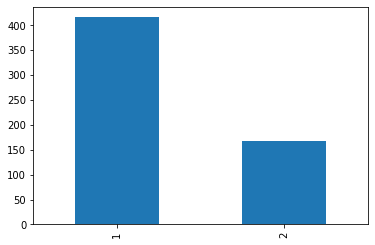

In [ ]:
data['Patient'].value_counts().plot(kind='bar');

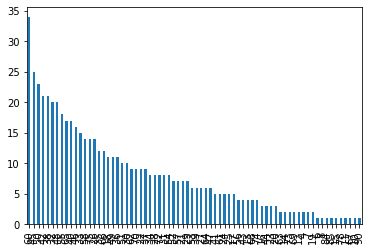

In [ ]:
data['Age'].value_counts().plot(kind='bar');

In [ ]:
data.isnull().sum() 
#A/G has 4 null values

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TB.1        0
ALB         0
A/G         4
Patient     0
dtype: int64

In [ ]:
data['A/G']=data['A/G'].fillna(value=data['A/G'].mean())

In [ ]:
data.isnull().sum() 

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TB.1        0
ALB         0
A/G         0
Patient     0
dtype: int64

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Gender'.
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Gender'].unique()

array([0, 1])

In [ ]:
data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TB.1,ALB,A/G,Patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


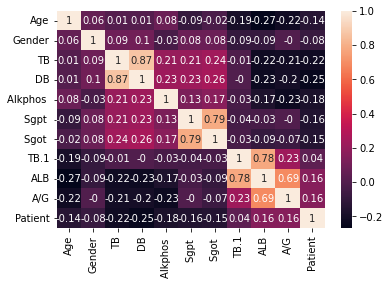

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


matrix = data.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
#Reference: https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn

from sklearn.model_selection import train_test_split

x = data.drop('Patient',axis=1)
y = data.Patient

x_train,x_testTemp,y_train,y_testTemp = train_test_split(x,y, test_size=0.30, random_state = 633)
## test size = 0.33 as the 10% of total is 33% of tempTest
x_test,x_val,y_test,y_val = train_test_split(x_testTemp,y_testTemp, test_size=0.33, random_state = 633)




In [ ]:
print("Length of data: ")
print(len(data))
print("Length of training data: ")
print(len(x_train))
print("Length of test data: ")
print(len(x_test))
print("Length of validation: ")
print(len(x_val))

Length of data: 
583
Length of training data: 
408
Length of test data: 
117
Length of validation: 
58


**Notes For Myself**: 
- Plot for age is really bad and messy 
- one hot encoding better, used label encoder
- corr plot is really messy, should try scaling from next time

#### Solution 6.2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [ ]:
DT = DecisionTreeClassifier(criterion="gini")
DT = DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print(y_pred)
print("Accuracy: ")
print(metrics.accuracy_score(y_test,y_pred))

[1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 2 1 2 2 1 2 1 1 1 2 1 2 1 1 2 1 1 1 2 2 2
 2 1 1 2 2 2 1 1 2 1 2 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 1 2 2 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 1 1 2 2 1 1 2 1 1 1 2 1 2 1
 2 1 1 1 1 1]
Accuracy: 
0.6239316239316239


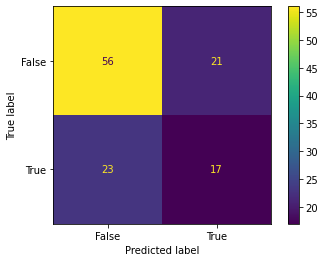

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
y_predValidate = DT.predict(x_val)
print(y_predValidate)
print("Accuracy: ")
print(metrics.accuracy_score(y_val,y_predValidate))

[1 1 1 2 2 2 2 1 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1
 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1]
Accuracy: 
0.6551724137931034


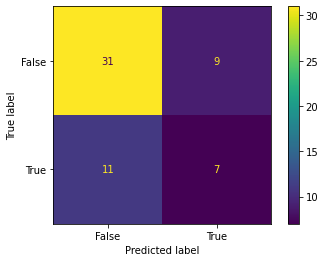

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_val, y_predValidate)

cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display1.plot()
plt.show()

**NEW METHOD**

In [ ]:
DT1 = DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=3)
DT1 = DT1.fit(x_train,y_train)
y_pred2 = DT1.predict(x_test)
print(y_pred2)
print("Accuracy: ")
print(metrics.accuracy_score(y_test,y_pred2))

[1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1 2 2 1 1 2 1 1 1 1 1 2 2
 2 1 1 1 2 2 1 1 2 1 2 2 1 1 2 2 1 1 2 1 2 1 1 1 1 1 1 2 2 1 1 1 2 2 2 1 2
 2 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 1 1 2 2 2 2 2 2 2 1 1 1 2 1
 2 1 1 1 2 2]
Accuracy: 
0.6239316239316239


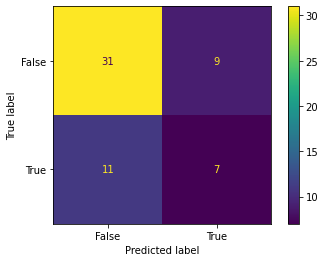

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_val, y_predValidate)

cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display1.plot()
plt.show()

In [ ]:
y_predValidate = DT.predict(x_val)
print(y_predValidate)
print("Accuracy: ")
print(metrics.accuracy_score(y_val,y_predValidate))

[1 1 1 2 2 2 2 1 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1
 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1]
Accuracy: 
0.6551724137931034


#### Solution 6.3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
y_predKnn = neigh.predict(x_test)
print("K=5 Test")
print(metrics.accuracy_score(y_test,y_predKnn))
y_predValidateKnn = neigh.predict(x_val)
print("K=5 Val")
print(metrics.accuracy_score(y_val,y_predValidateKnn))

K=5 Test
0.6324786324786325
K=5 Val
0.7241379310344828


In [ ]:
neigh2 = KNeighborsClassifier(n_neighbors=9)
neigh2.fit(x_train, y_train)
y_predKnn2 = neigh.predict(x_test)
print("K=9 Test ->")
print(metrics.accuracy_score(y_test,y_predKnn2))
y_predValidateKnn2 = neigh.predict(x_val)
print(", K=9 Val->")
print(metrics.accuracy_score(y_val,y_predValidateKnn2))

K=9 Test ->
0.6324786324786325
, K=9 Val->
0.7241379310344828


K=1 Test ->
0.6239316239316239
K=1 Val->
0.6551724137931034


K=3 Test ->
0.6153846153846154
, K=3 Val->
0.7068965517241379


K=7 Test ->
0.6068376068376068
, K=7 Val->
0.6724137931034483


K=9 Test ->
0.6581196581196581
, K=9 Val->
0.6724137931034483



**BEST IS K=5**

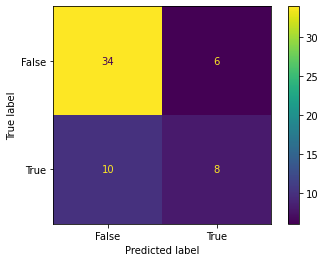

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_val, y_predValidateKnn2)

cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display1.plot()
plt.show()

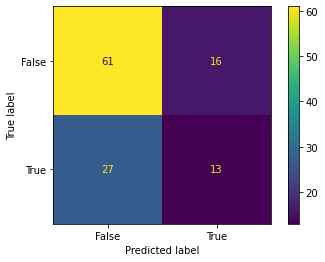

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predKnn2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

**After normalizing the input features**

In [ ]:
from sklearn.model_selection import train_test_split

x1 = data.drop('Patient',axis=1)
y1 = data.Patient

data_normalized = preprocessing.normalize(x1)
names=x1.columns
scaled_df = pd.DataFrame(data_normalized, columns=names)
scaled_df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TB.1,ALB,A/G
0,0.325683,0.000000,0.003507,0.000501,0.936965,0.080168,0.090189,0.034071,0.016535,0.004509
1,0.087095,0.001405,0.015312,0.007726,0.981922,0.089904,0.140475,0.010536,0.004495,0.001040
2,0.123434,0.001991,0.014533,0.008163,0.975523,0.119452,0.135379,0.013936,0.006570,0.001772
3,0.300939,0.005189,0.005189,0.002075,0.944325,0.072640,0.103772,0.035282,0.017641,0.005189
4,0.330364,0.004588,0.017895,0.009177,0.894736,0.123887,0.270715,0.033495,0.011012,0.001835


In [ ]:
x_train,x_testTemp,y_train,y_testTemp = train_test_split(x1,y1, test_size=0.30, random_state = 633)

x_test,x_val,y_test,y_val = train_test_split(x_testTemp,y_testTemp, test_size=0.33, random_state = 633)

In [ ]:
neigh_norm = KNeighborsClassifier(n_neighbors=5)
neigh_norm.fit(x_train, y_train)
y_predKnn_Norm = neigh.predict(x_test)
print("K=5 Test")
print(metrics.accuracy_score(y_test,y_predKnn_Norm))
y_predValidateKnn_Norm = neigh.predict(x_val)
print("K=5 Val")
print(metrics.accuracy_score(y_val,y_predValidateKnn_Norm))

K=5 Test
0.6324786324786325
K=5 Val
0.7241379310344828


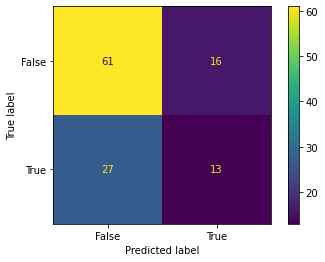

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predKnn_Norm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

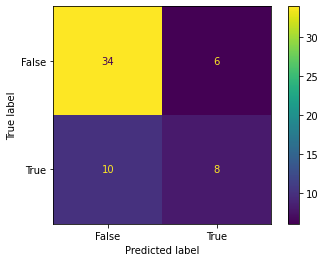

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_val, y_predValidateKnn_Norm)

cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display1.plot()
plt.show()

#### Solution 6.4

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
#DECISION TREE
cross_val_score(DecisionTreeClassifier(criterion='gini'),x,y,cv=5).mean()

0.6586354258768051

In [ ]:
#KNN
cross_val_score(KNeighborsClassifier(n_neighbors=5),x,y,cv=5).mean()

0.6637783672266431

In [ ]:
#KNN 2
cross_val_score(KNeighborsClassifier(n_neighbors=6),x,y,cv=5).mean()

#### Solution 6.5

In [ ]:
#RANDOM FOREST CLASSIFIER
cross_val_score(RandomForestClassifier(n_estimators=40),x,y,cv=5).mean()

In [ ]:
#SVM
cross_val_score(SVC(gamma='auto'), x,y,cv=5).mean()

In [ ]:
#LOGISTIC REGRESSION
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x,y,cv=5).mean()

**EXTRA**
    

In [ ]:
import pandas as pd 

explore = pd.read_csv("ILPD.csv") 
# Preview the first 5 lines of the loaded data 
explore.head()

In [ ]:

from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Gender'.
explore['Gender']= label_encoder.fit_transform(data['Gender'])
print(explore['Gender'].unique())
print("")
print(explore.head())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


cor_matrix = explore.corr().abs().round(3)
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
#REFERENCE : https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(to_drop)

In [ ]:
# Tried removing the column TB.1 as it has least coorlation with patient 
# Tried removing the column DB as it has high coorlation with TB
# Tried removing both just to check

explore1 = explore.drop(['DB'],axis=1)
explore1.head()

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop('Patient',axis=1)
y = data.Patient

x_train,x_testTemp,y_train,y_testTemp = train_test_split(x,y, test_size=0.30, random_state = 633)

x_test,x_val,y_test,y_val = train_test_split(x_testTemp,y_testTemp, test_size=0.33, random_state = 633)


In [ ]:
DT = DecisionTreeClassifier(criterion="entropy")
DT = DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print(y_pred)
print("Accuracy: ")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy without TB.1 and DB: 
  0.5897435897435898

Accuracy without DB: 
  0.6324786324786325

Accuracy without TB.1: 0.6495726495726496



In [ ]:
explore1.columns

### **Dont Run: Tried Something did not work**

In [ ]:
## DOES NOT WORK//// was trying to make a grid of box plots

boxplotAge = explore1.boxplot(column=['Age'])   
boxplotTB = explore1.boxplot(column=['TB'])
boxplotAlkphos = explore1.boxplot(column=['Alkphos '])
#boxplotSgpt = explore1.boxplot(column=['Sgpt'])
#boxplotSgot = explore1.boxplot(column=['Sgot'])
boxplotTB1 = explore1.boxplot(column=['TB.1'])
boxplotALB = explore1.boxplot(column=['ALB'])
boxplotAG = explore1.boxplot(column=['A/G'])

figure, axis = plt.subplots(3, 2)
  
# For 
axis[0,0].plot(boxplotAge)
axis[0,0].set_title("boxplot Age")
  
# For 
axis[0,1].plot(boxplotTB)
axis[0,1].set_title("boxplot TB")
  
# For 
axis[1,0].plot(boxplotAlkphos)
axis[1,0].set_title("Boxplot Alkphos")
  
# For 
axis[1,1].plot(boxplotTB1)
axis[1,1].set_title("boxplot TB.1")
  
# Combined
plt.show()

### **Run form here again**

<AxesSubplot:>

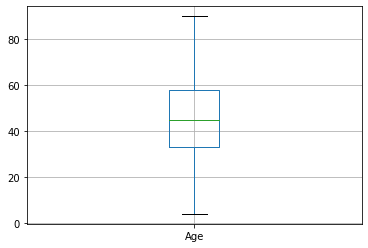

In [ ]:
explore1.boxplot(column=['Age'])

<AxesSubplot:>

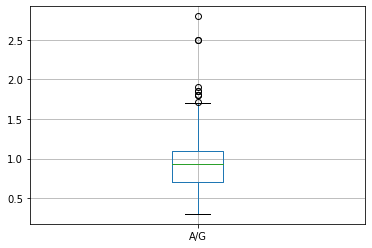

In [ ]:
explore1.boxplot(column=['A/G'])  ## Not showing all plots as code becomes too long but tried all

In [ ]:
# IQR
Q1 = np.percentile(explore1['TB'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(explore1['TB'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", explore1.shape)
 
# Upper bound
upper = np.where(explore1['TB'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(explore1['TB'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
explore1.drop(upper[0], inplace = True)
explore1.drop(lower[0], inplace = True)
 
print("New Shape: ", explore1.shape)


Old Shape:  (583, 10)
New Shape:  (499, 10)


In [ ]:
explore1['A/G']=explore1['A/G'].fillna(value=explore1['A/G'].mean())
explore1.isnull().sum() 

Age         0
Gender      0
TB          0
Alkphos     0
Sgpt        0
Sgot        0
TB.1        0
ALB         0
A/G         0
Patient     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x = explore1.drop('Patient',axis=1)
y = explore1.Patient

x_train,x_testTemp,y_train,y_testTemp = train_test_split(x,y, test_size=0.30, random_state = 633)

x_test,x_val,y_test,y_val = train_test_split(x_testTemp,y_testTemp, test_size=0.33, random_state = 633)

In [ ]:
## performs a lot better gives mean accuracy of 70 which is better than normal
DT = DecisionTreeClassifier(criterion="gini")
DT = DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print(y_pred)
print("Accuracy: ")
print(metrics.accuracy_score(y_test,y_pred))

[1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 2 1 1 1 1 1 2 2 2 2 2 1 1 1 2 1 1 1 1 2 1
 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1 2 1 1 1 1 2 2 2 2 1 1 2 1 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 2 2 1 2 1 2 1 1 1]
Accuracy: 
0.69
